# Agent-Based Modelling

### _Shreya Raghavendra (13756877), Boyan Mihaylov (15067602), Eline van de Lagemaat (11892900), Sofia Tavitian (14824248), Chayenne Olumuyiwa (12055662)_

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import pyarrow as pa
import pyarrow.parquet as pq

import model as mdl
import agent as agt
import visualisation as vis
import sensitivity_analysis as sa

/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/visualisation.py:161: SyntaxWarning: invalid escape sequence '\%'
  'top_n_sites_percent': '$P_\%$'


In [2]:
import warnings
warnings.filterwarnings("ignore")

## 1. Model Setup

In [11]:
reload(mdl)
reload(agt)
reload(vis)

reload(mdl)
reload(agt)
reload(vis)

<module 'visualisation' from '/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/visualisation.py'>

/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:54: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:58: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('soil_fertility', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:54: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:58: UserWarning: Default value 1 (int) might not be best suitable wi

0


/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:54: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:58: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('soil_fertility', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:54: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:58: UserWarning: Default value 1 (int) might not be best suitable wi

1


/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:54: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:58: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('soil_fertility', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:54: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:58: UserWarning: Default value 1 (int) might not be best suitable wi

2


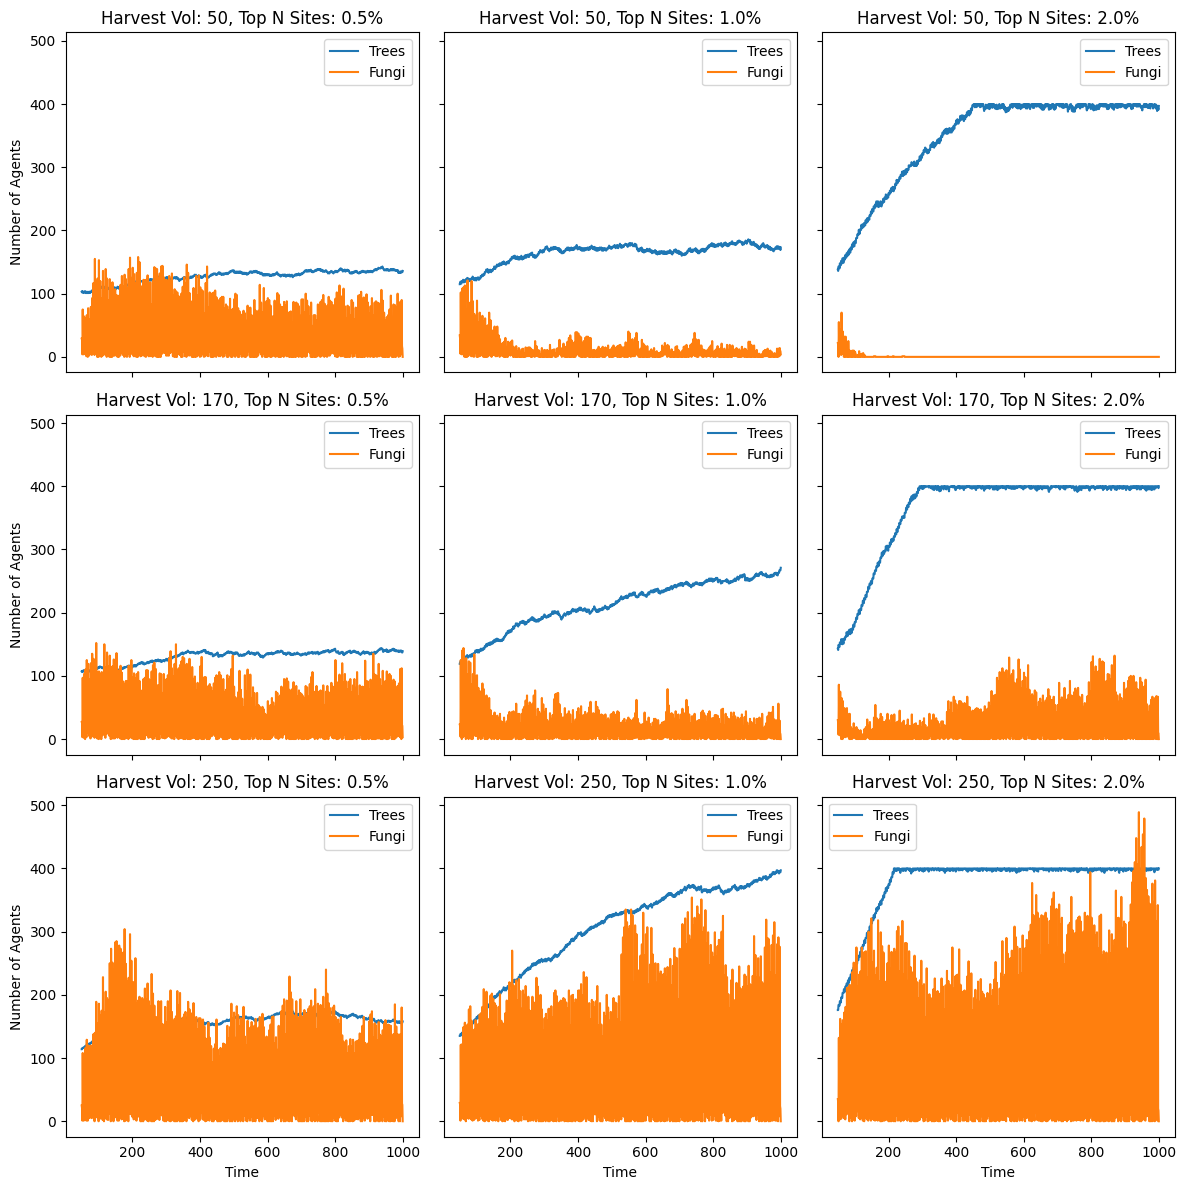

In [19]:
%matplotlib inline

width = 20
height = 20
n_init_trees = 100
n_init_fungi = 50
fert_comp_ratio_exponent = 0.5
top_n_sites_percent_values = [0.005, 0.01, 0.02]
harvest_volume_values = [50, 170, 250]
max_substrate=3
max_soil_fertility=1

# Initialize the model and run it for each combination of parameters
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)

for i, top_n_sites_percent in enumerate(top_n_sites_percent_values):
    for j, harvest_volume in enumerate(harvest_volume_values):
        # Update the harvest parameters
        harvest_params = [harvest_volume, 4, 0.5]
        
        # Create and run the model
        model = mdl.Forest(width, height, n_init_trees, n_init_fungi, harvest_params, fert_comp_ratio_exponent, 
                           max_substrate, max_soil_fertility, top_n_sites_percent)
        model.run_model(n_steps=1000)
        
        # Collect the data
        data = model.datacollector.get_model_vars_dataframe()
        
        # # Plot the data
        # ax = axes[j, i]
        # data["Trees_div10"] = data["Trees"] / 10
        # data[["Trees_div10", "Fungi"]].plot(ax=ax)
        # ax.set_title(f'Harvest Vol: {harvest_volume}, Top N Sites: {top_n_sites_percent * 100}%')
        # ax.set_xlabel('Time')
        # ax.set_ylabel('Number of Agents')
        # if j == 2:
        #     ax.legend(["Trees/10", "Fungi"])
        # else:
        #     ax.legend().set_visible(False)

        # Plot the data
        ax = axes[j, i]
        data[["Trees", "Fungi"]].iloc[50:].plot(ax=ax)
        ax.set_title(f'Harvest Vol: {harvest_volume}, Top N Sites: {top_n_sites_percent * 100}%')
        ax.set_xlabel('Time')
        ax.set_ylabel('Number of Agents')
        
    print(i)

plt.tight_layout()
plt.show()

/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:54: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:58: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('soil_fertility', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:54: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:58: UserWarning: Default value 1 (int) might not be best suitable wi

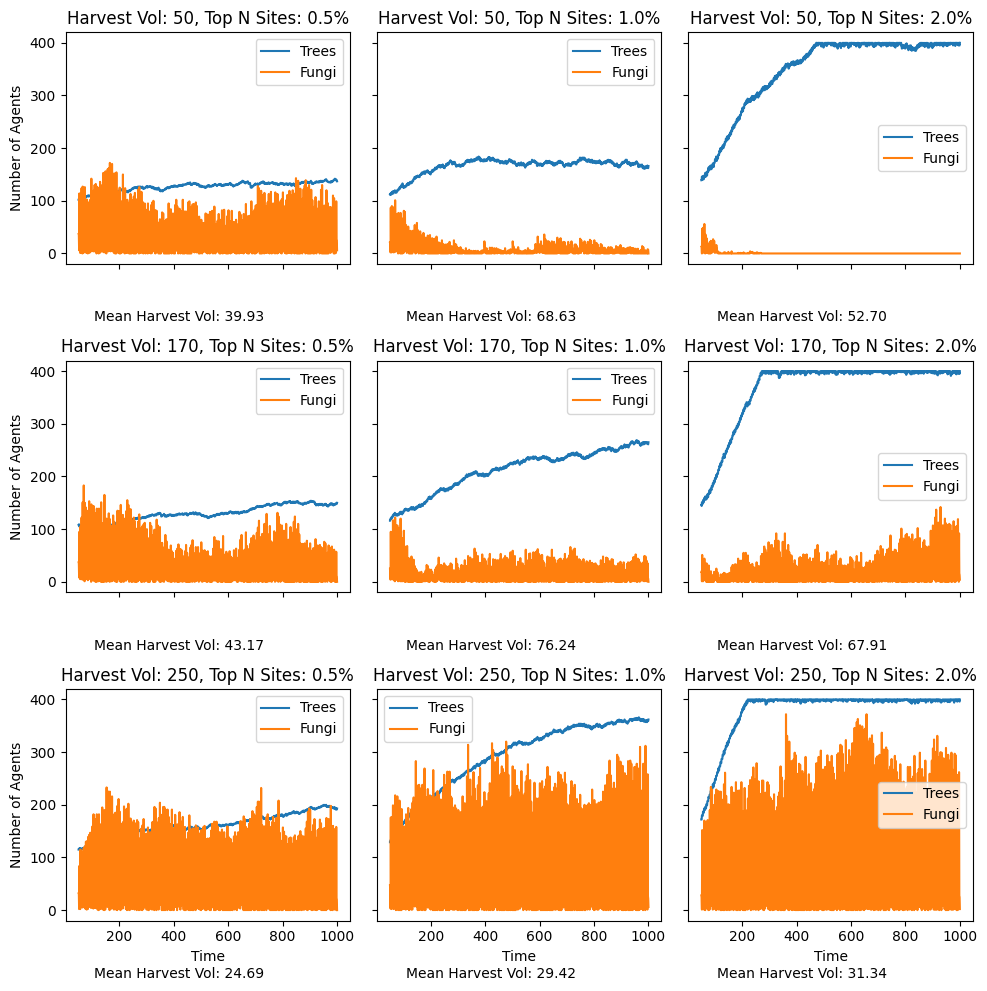

In [26]:


# Initialize the model and run it for each combination of parameters
fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=True, sharey=True)

for i, top_n_sites_percent in enumerate(top_n_sites_percent_values):
    for j, harvest_volume in enumerate(harvest_volume_values):
        # Update the harvest parameters
        harvest_params = [harvest_volume, 4, 0.5]
        
        # Create and run the model
        model = mdl.Forest(width, height, n_init_trees, n_init_fungi, harvest_params, fert_comp_ratio_exponent, 
                           max_substrate, max_soil_fertility, top_n_sites_percent)        
        model.run_model(n_steps=1000)
        
        # Collect the data
        data = model.datacollector.get_model_vars_dataframe()
        
        # Calculate the mean and standard deviation of harvested volume
        harvested_volume_mean = data["Harvested volume"].mean()
        # harvested_volume_std = data["Harvested volume"].std()
        
        # Plot the data starting from the 50th time step
        ax = axes[j, i]
        data[["Trees", "Fungi"]].iloc[50:].plot(ax=ax)
        ax.set_title(f'Harvest Vol: {harvest_volume}, Top N Sites: {top_n_sites_percent * 100}%')
        ax.set_xlabel('Time')
        ax.set_ylabel('Number of Agents')
        
        # Print the mean and standard deviation below the plot
        textstr = '\n'.join((
            f'Mean Harvest Vol: {harvested_volume_mean:.2f}',
        ))
        ax.text(0.4, -0.2, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='center')

plt.tight_layout()
plt.show()

In [27]:
reload(vis)
reload(agt)
reload(mdl)

reload(vis)
reload(agt)
reload(mdl)

<module 'model' from 'd:\\MSc Computational Science\\S02P03\\Agent Based Modelling\\GitHub\\agent-based-modelling\\Project\\model.py'>

In [28]:
model_params = {
    "n_init_trees": {
        "type": "SliderInt",
        "value": 100,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "n_init_fungi": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 20,
    "height": 20,
    "harvest_params": [150,4,0.5],
    "fert_comp_ratio_exponent": -0.3,
    "top_n_sites_percent": 0.01
}

page = vis.create_jupyter_viz(mdl.Forest, model_params, measures=["Trees", "Fungi", "Living Trees Total Volume", "Harvested volume",
                                                                  "Infected Trees", "Mean Substrate", "Mean Soil Fertility"])

page

d:\MSc Computational Science\S02P03\Agent Based Modelling\GitHub\agent-based-modelling\Project\model.py:54: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
d:\MSc Computational Science\S02P03\Agent Based Modelling\GitHub\agent-based-modelling\Project\model.py:58: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('soil_fertility', self.width, self.height, 1))


<IPython.core.display.Javascript object>

d:\MSc Computational Science\S02P03\Agent Based Modelling\GitHub\agent-based-modelling\Project\model.py:54: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
d:\MSc Computational Science\S02P03\Agent Based Modelling\GitHub\agent-based-modelling\Project\model.py:58: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('soil_fertility', self.width, self.height, 1))


<IPython.core.display.Javascript object>

Cannot show ipywidgets in text

## 2. Sensitivity Analysis

In [3]:
reload(mdl)
reload(sa)
reload(agt)
reload(vis)

reload(mdl)
reload(sa)
reload(agt)
reload(vis)

<module 'visualisation' from 'd:\\MSc Computational Science\\S02P03\\Agent Based Modelling\\GitHub\\agent-based-modelling\\Project\\visualisation.py'>

In [5]:
problem = {
    'num_vars': 5,
    'names': ['harvest_volume', 'harvest_nbrs', 'harvest_prob', 'fert_comp_ratio_exponent', 'top_n_sites_percent'],
    'bounds': [[50, 300],
               [0, 8],
               [0, 1],
               [-1, 1],
               [0, 1]]
}

outputs = ["Trees", "Fungi", "Living Trees Total Volume", "Harvested volume", "Infected Trees", "Mean Substrate", "Mean Soil Fertility"]

# Random seed (CHANGE WHEN RUNNING A DIFFERENT BATCH!)
seed = 42

data = sa.run_batches(mdl.Forest, problem , outputs=outputs, n_max_timesteps=1000, n_replicates=20, n_distinct_samples=64, seed=seed)

In [150]:
print(data.head(2405))
data

      RunId  Step  harvest_volume  harvest_nbrs  harvest_prob  \
0         0     0         73.4375             3       0.46875   
1         0     1         73.4375             3       0.46875   
2         0     2         73.4375             3       0.46875   
3         0     3         73.4375             3       0.46875   
4         0     4         73.4375             3       0.46875   
...     ...   ...             ...           ...           ...   
2400      2   398         73.4375             3       0.46875   
2401      2   399         73.4375             3       0.46875   
2402      2   400         73.4375             3       0.46875   
2403      2   401         73.4375             3       0.46875   
2404      2   402         73.4375             3       0.46875   

      fert_comp_ratio_exponent  top_n_sites_percent  Trees  Fungi  \
0                       0.3125              0.28125    100     50   
1                       0.3125              0.28125     87     34   
2           

,RunId,Step,harvest_volume,harvest_nbrs,harvest_prob,fert_comp_ratio_exponent,top_n_sites_percent,Trees,Fungi,Living Trees Total Volume,Infected Trees,Mean Substrate,Mean Soil Fertility,Harvested volume,SimId
0,0,0,73.4375,3,0.46875,0.3125,0.28125,100,50,14816.000000,0,0.9600,0.490744,0.000000,0
1,0,1,73.4375,3,0.46875,0.3125,0.28125,87,34,12385.463083,0,0.9100,0.157996,2517.968927,0
2,0,2,73.4375,3,0.46875,0.3125,0.28125,84,40,12043.905199,4,0.8975,0.123697,402.936310,0
3,0,3,73.4375,3,0.46875,0.3125,0.28125,81,20,11539.859875,3,0.8925,0.109213,561.462438,0
4,0,4,73.4375,3,0.46875,0.3125,0.28125,191,17,11438.508666,2,0.8975,0.109711,271.212897,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720715,29,996,167.1875,0,0.34375,0.9375,0.65625,400,2,4894.077018,36,0.0175,0.163329,0.000000,719
720716,29,997,167.1875,0,0.34375,0.9375,0.65625,399,63,4932.847384,36,0.0350,0.158405,0.000000,719
720717,29,998,167.1875,0,0.34375,0.9375,0.65625,398,13,5015.709453,36,0.0075,0.180033,0.000000,719
720718,29,999,167.1875,0,0.34375,0.9375,0.65625,395,12,4930.562857,36,0.0150,0.167786,168.987742,719


In [5]:
# Write parquet file
table = pa.Table.from_pandas(data)
pq.write_table(table, f'sa_results_seed_{seed}.parquet')

In [7]:
# table_read = pq.read_table(f'sa_results_seed_{seed}.parquet')
table_read = pq.read_table(f'sa_results_seed_{seed}.parquet')
data_read = table_read.to_pandas()
data_read

,RunId,Step,harvest_volume,harvest_nbrs,harvest_prob,fert_comp_ratio_exponent,top_n_sites_percent,Trees,Fungi,Living Trees Total Volume,Infected Trees,Mean Substrate,Mean Soil Fertility,Harvested volume,SimId
0,0,0,55.859375,3,0.820312,0.671875,0.648438,100,50,13751.000000,0,1.0100,0.487769,0.000000,0
1,0,1,55.859375,3,0.820312,0.671875,0.648438,80,34,10569.759921,0,0.9500,0.177334,3312.968217,0
2,0,2,55.859375,3,0.820312,0.671875,0.648438,80,45,10649.989006,11,0.9275,0.143895,0.000000,0
3,0,3,55.859375,3,0.820312,0.671875,0.648438,80,27,10720.647941,11,0.9025,0.140196,0.000000,0
4,0,4,55.859375,3,0.820312,0.671875,0.648438,339,21,11048.021320,11,0.8975,0.125871,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15375355,19,996,133.984375,1,0.070312,-0.171875,0.539062,400,0,4361.993691,43,0.0425,0.077338,0.000000,15359
15375356,19,997,133.984375,1,0.070312,-0.171875,0.539062,397,58,4146.919490,42,0.0475,0.070764,290.611472,15359
15375357,19,998,133.984375,1,0.070312,-0.171875,0.539062,397,10,4222.785383,42,0.0225,0.091760,0.000000,15359
15375358,19,999,133.984375,1,0.070312,-0.171875,0.539062,397,10,4299.345993,42,0.0200,0.087184,0.000000,15359


In [23]:
reload(vis)
reload(vis)
reload(sa)
reload(sa)

<module 'sensitivity_analysis' from 'd:\\MSc Computational Science\\S02P03\\Agent Based Modelling\\GitHub\\agent-based-modelling\\Project\\sensitivity_analysis.py'>

dict_keys(['Trees', 'Fungi', 'Living Trees Total Volume', 'Harvested volume', 'Infected Trees', 'Mean Substrate', 'Mean Soil Fertility'])


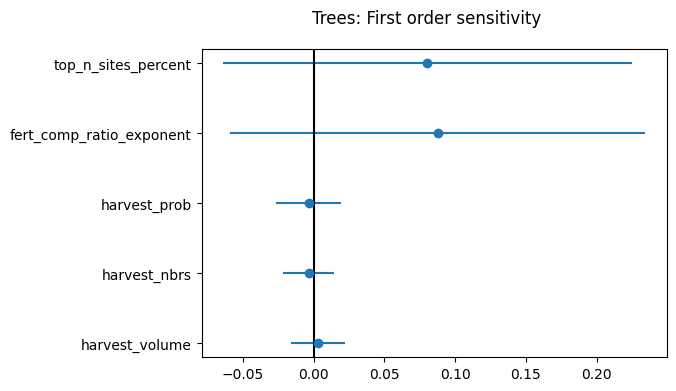

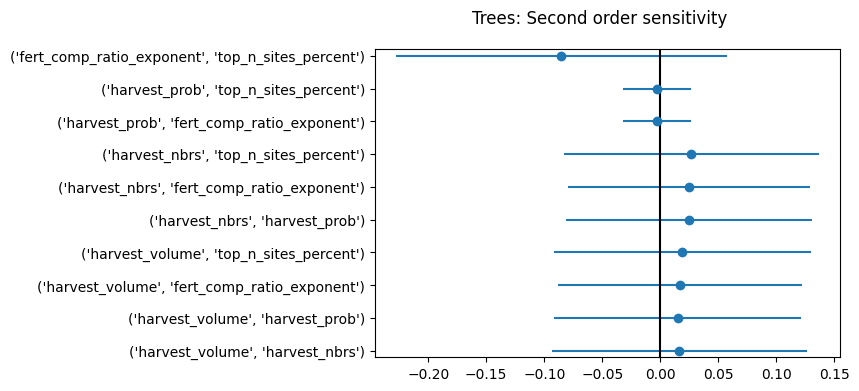

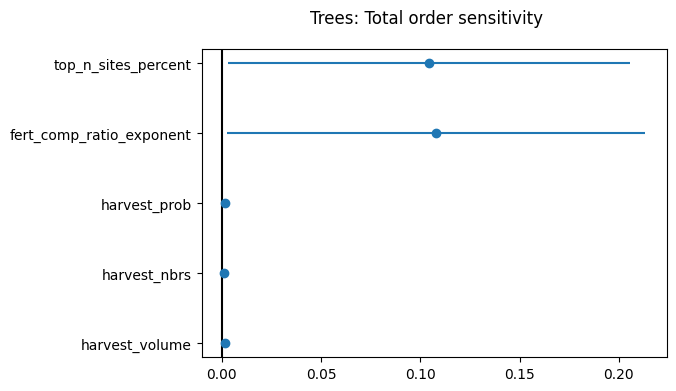

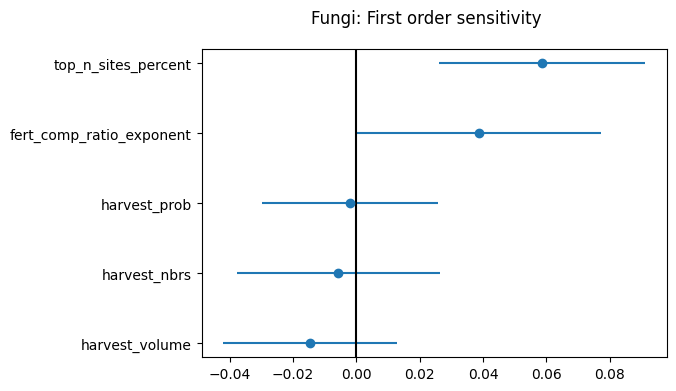

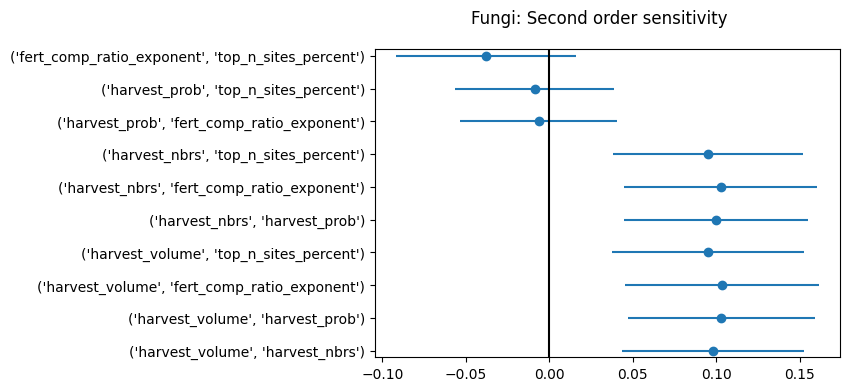

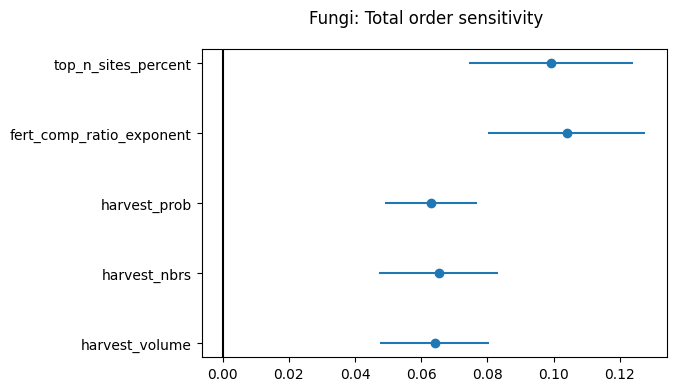

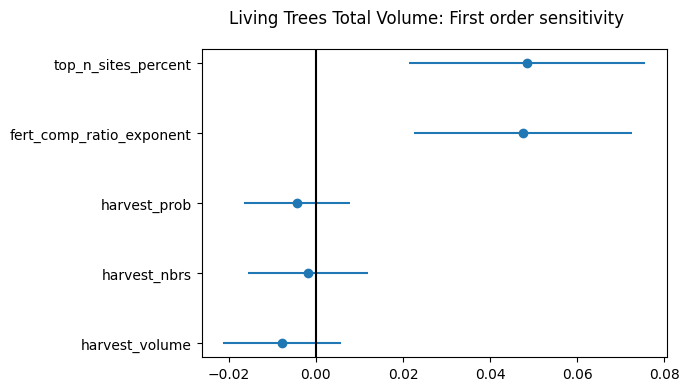

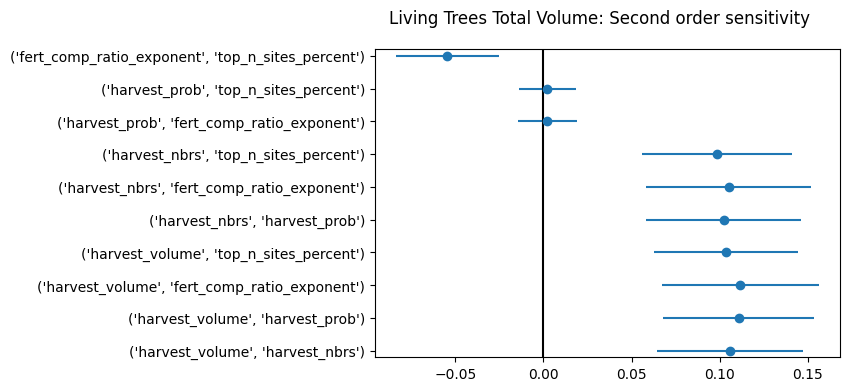

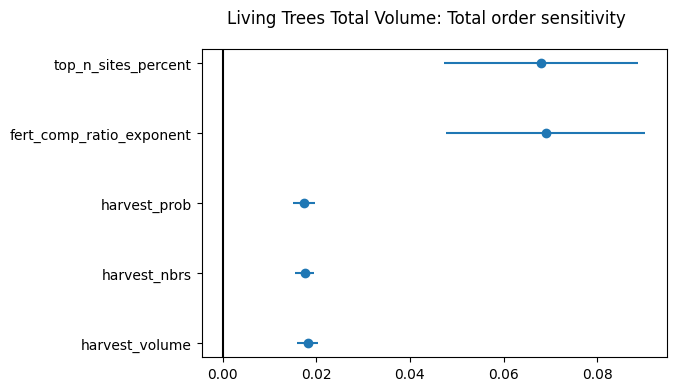

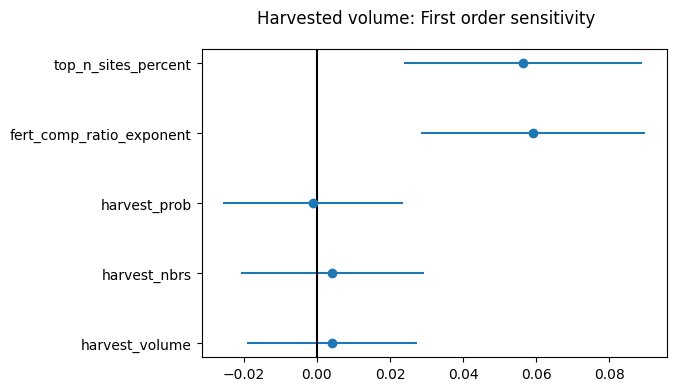

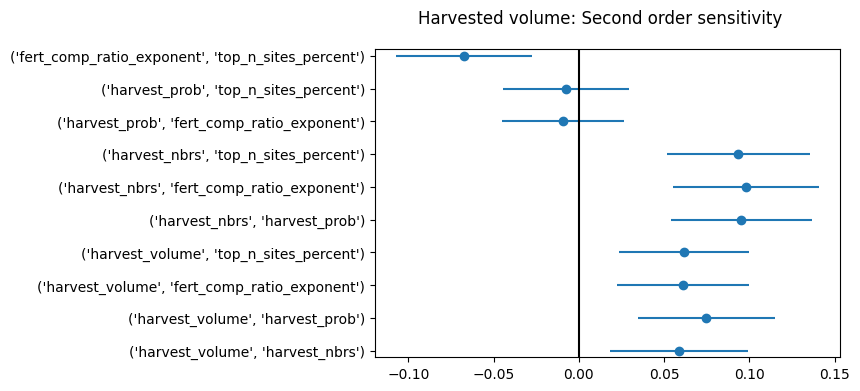

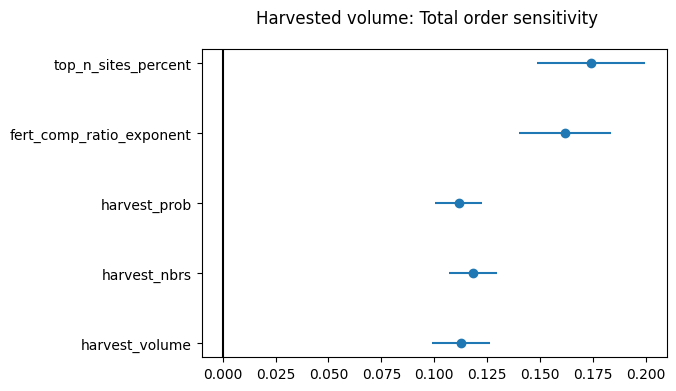

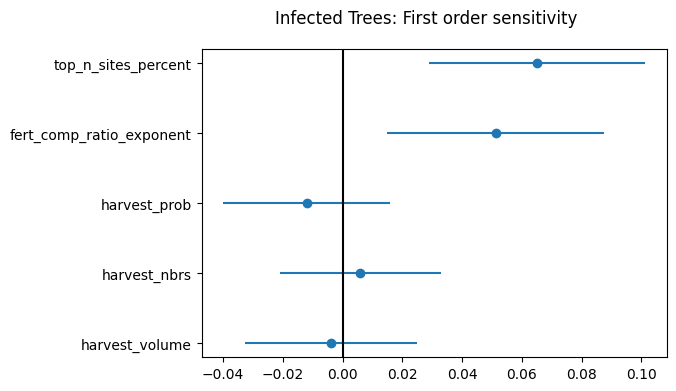

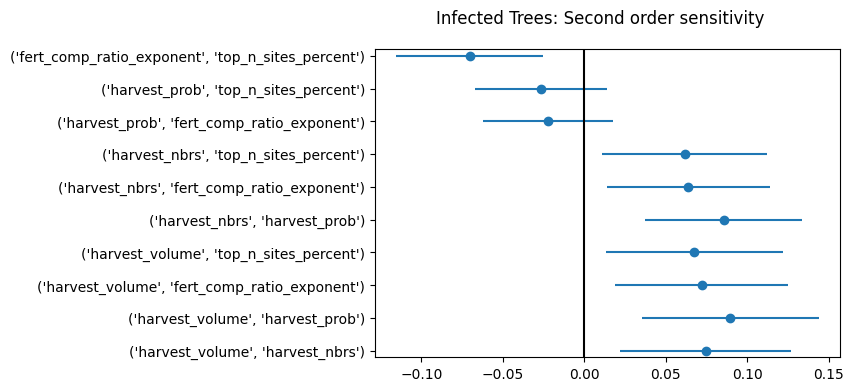

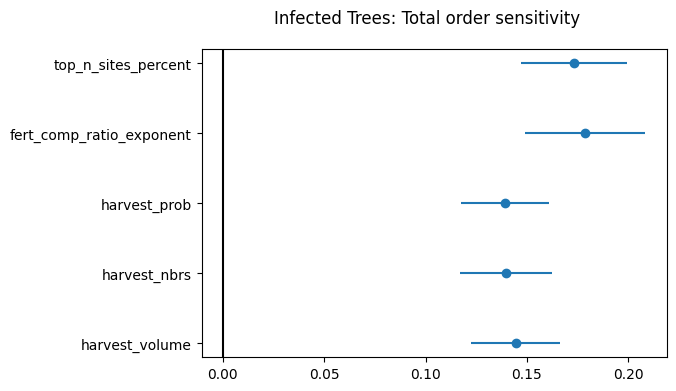

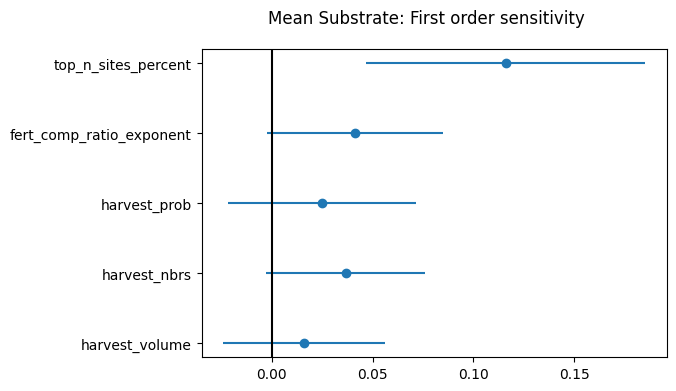

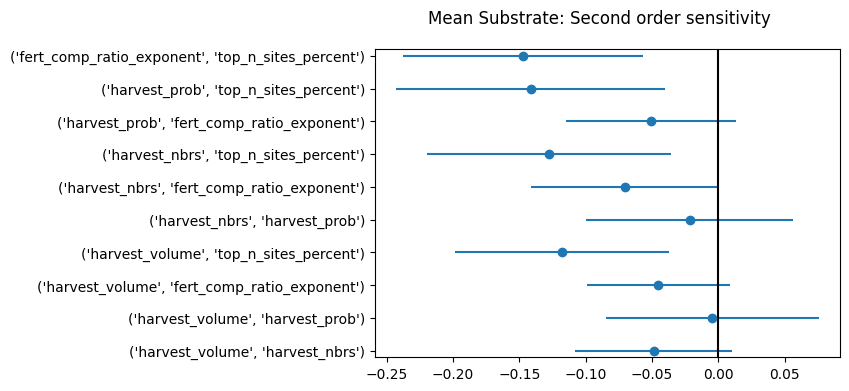

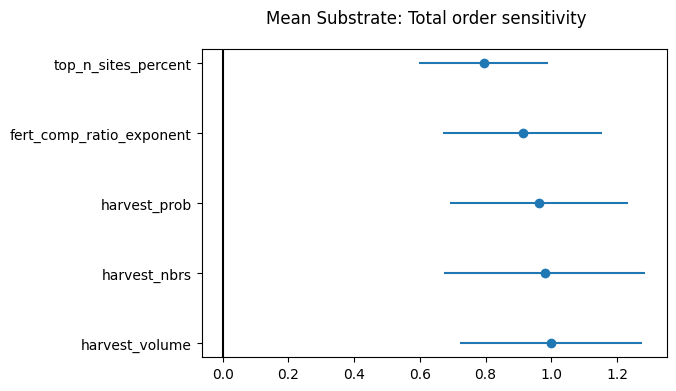

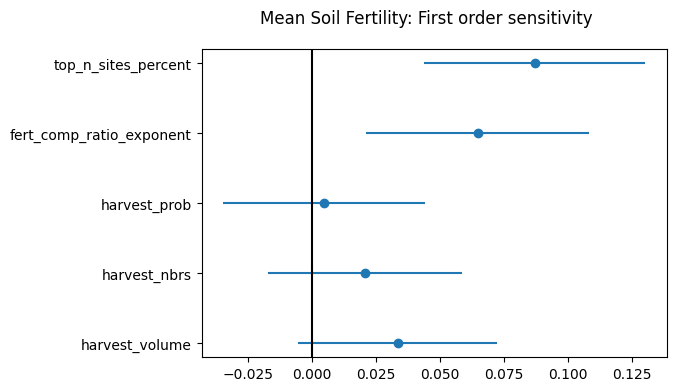

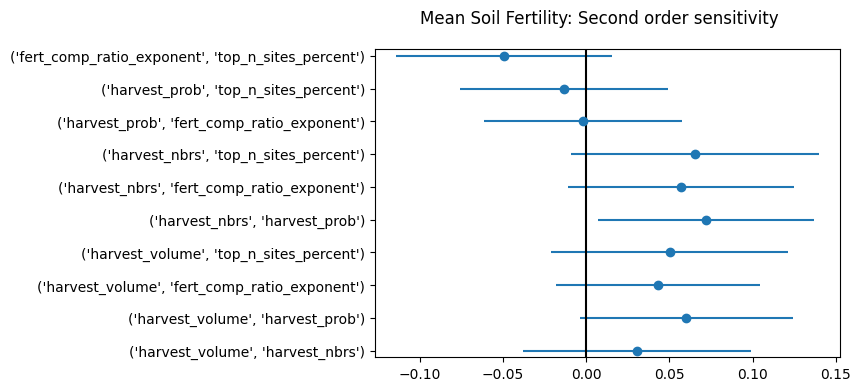

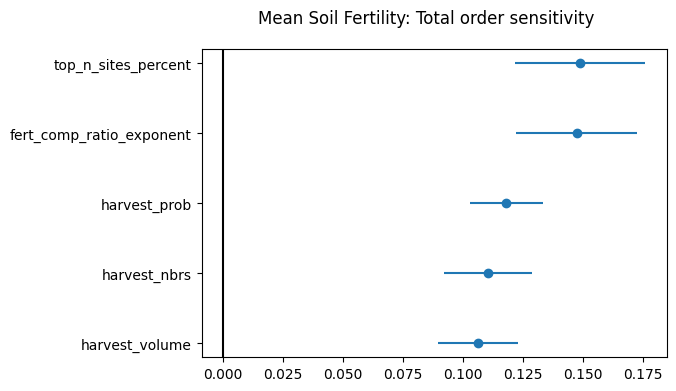

In [24]:
%matplotlib inline

si = sa.sobol_analyse(data_read, problem, outputs, mean_over_last=100)

vis.plot_index(si, problem['names'])

In [35]:
reload(vis)
reload(vis)

<module 'visualisation' from 'd:\\GitHub\\agent-based-modelling\\Project\\visualisation.py'>

Parameter values for simulation 1000:
SimId                       1000.000000
harvest_volume               149.609375
harvest_nbrs                   6.000000
harvest_prob                   0.445312
fert_comp_ratio_exponent      -0.578125
top_n_sites_percent            0.773438
Name: 0, dtype: float64


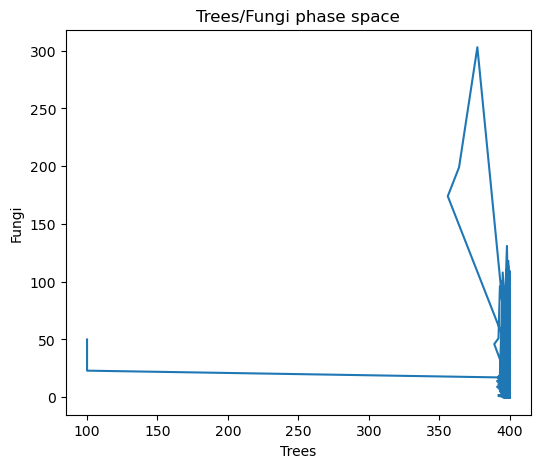

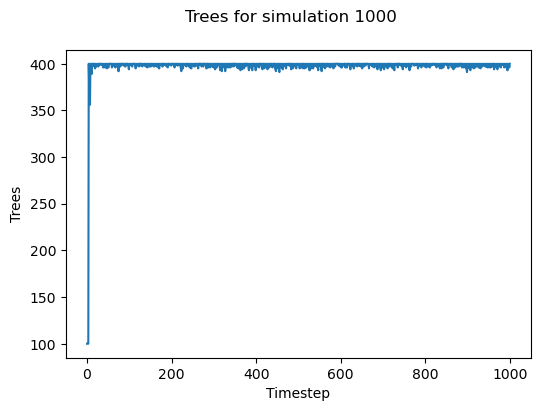

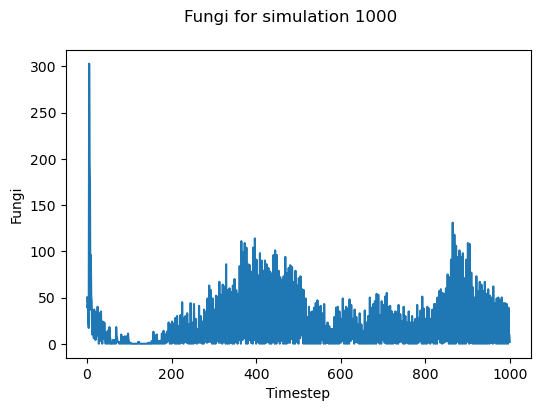

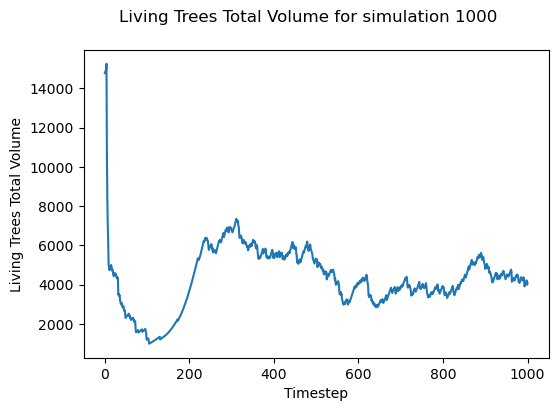

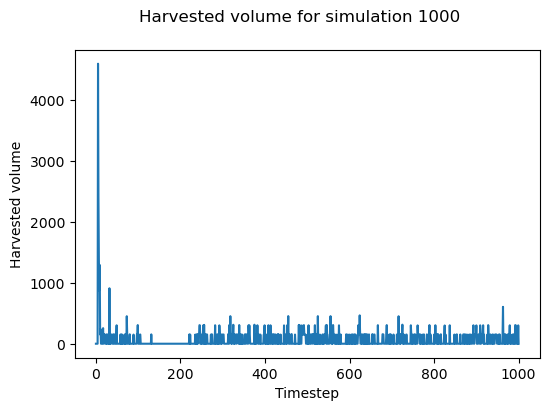

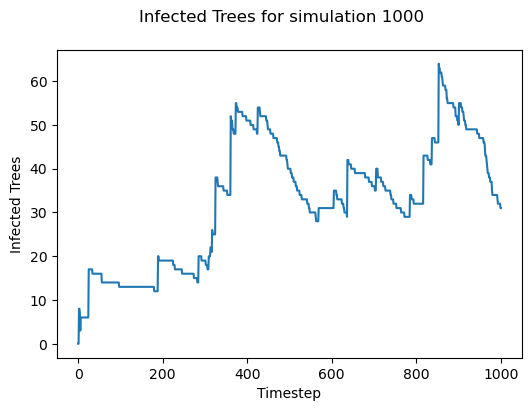

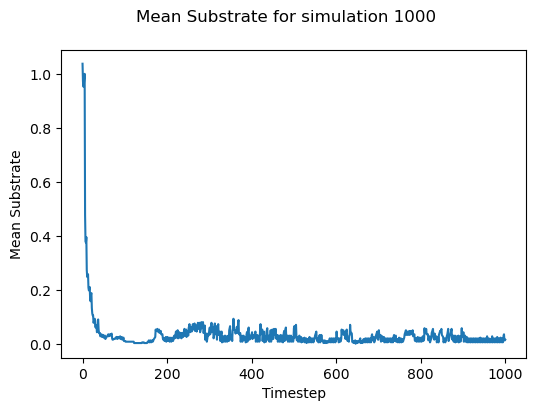

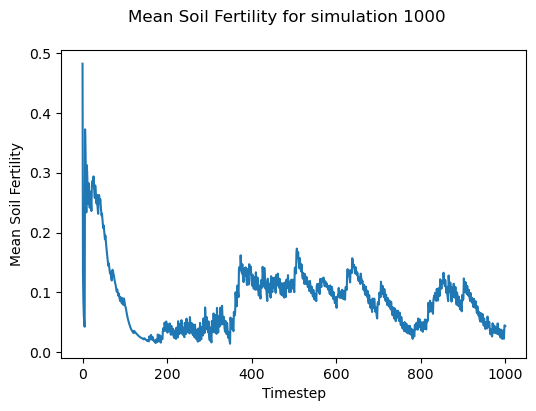

In [9]:
# %matplotlib inline

vis.query_simulation_run(data_read, 1000, outputs, problem)

In [10]:
reload(vis)
reload(vis)

<module 'visualisation' from 'd:\\MSc Computational Science\\S02P03\\Agent Based Modelling\\GitHub\\agent-based-modelling\\Project\\visualisation.py'>

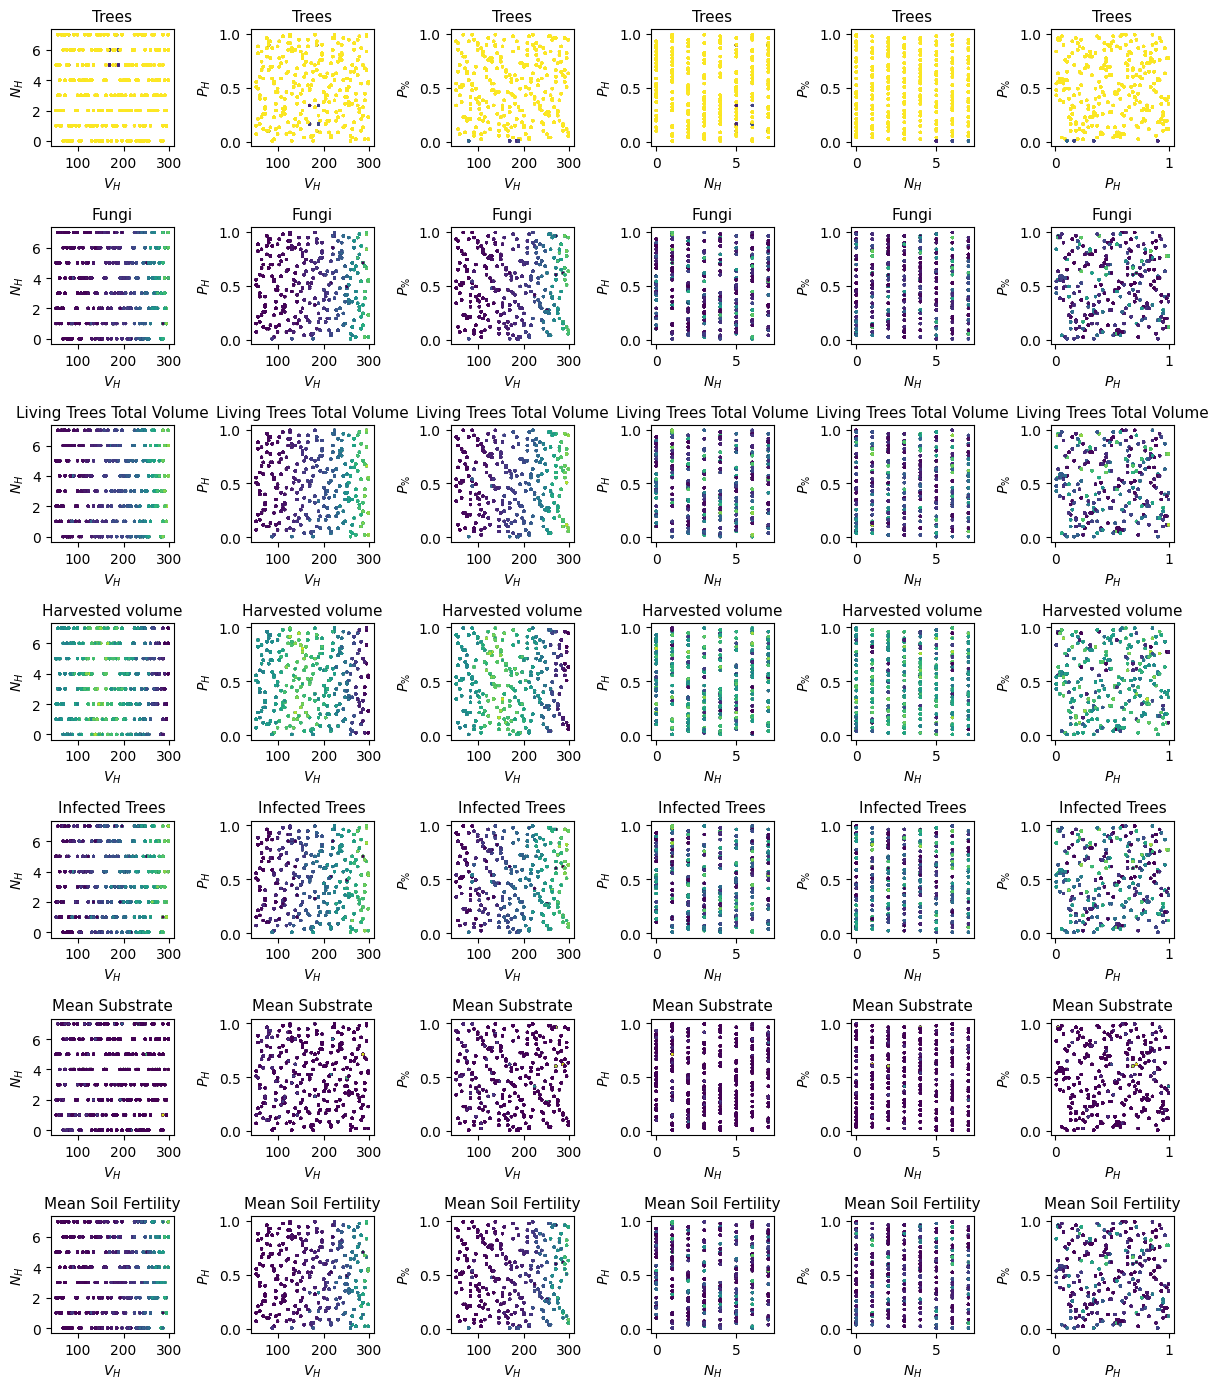

In [11]:
%matplotlib inline

vis.plot_param_space_array(data_read,
                           ['harvest_volume', 'harvest_nbrs', 'harvest_prob', 'top_n_sites_percent'],
                           outputs)

In [7]:
%matplotlib inline

# Plot samples in parameter space
vis.plot_param_space(data_read, 'Living Trees Total Volume')

TypeError: plot_param_space() missing 2 required positional arguments: 'param1' and 'param2'